In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Gaussian Function

### Generate Data

In [18]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.5, 0.01)-gaussian(x, 0.2, 0.01) - gaussian(x, 0.8, 0.01) 

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


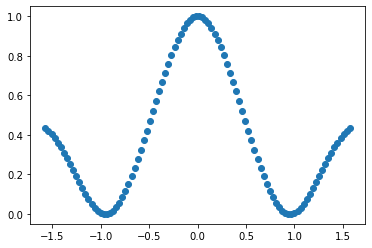

In [19]:
plt.plot(x_qnn, y, 'o')
plt.show()

### Training Models

In [20]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [1, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.15369222831778623
epoch: 1, loss: 0.12208509365613653
epoch: 2, loss: 0.10056557230256587
epoch: 3, loss: 0.08793734228161769
epoch: 4, loss: 0.07797110098134745
epoch: 5, loss: 0.06700043841494065
epoch: 6, loss: 0.05770790533655073
epoch: 7, loss: 0.05141550853768334
epoch: 8, loss: 0.04580491423423064
epoch: 9, loss: 0.03886285432013398
epoch: 10, loss: 0.03188263986433291
epoch: 11, loss: 0.02614546570939757
epoch: 12, loss: 0.02149772603759839
epoch: 13, loss: 0.018619523666665565
epoch: 14, loss: 0.01784537656869776
epoch: 15, loss: 0.017564328323453823
epoch: 16, loss: 0.017302863801686136
epoch: 17, loss: 0.016142919266751016
epoch: 18, loss: 0.015143859529852158
epoch: 19, loss: 0.015749363288939916
epoch: 20, loss: 0.017049352855453934
epoch: 21, loss: 0.017701185492414458
epoch: 22, loss: 0.015979539527611702
epoch: 23, loss: 0.014823229041111465
epoch: 24, loss: 0.014934766000597937
epoch: 25, loss: 0.015224847241302903
epoch: 26, loss: 0.01478588430729731

In [21]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [1, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1445368595146391
epoch: 1, loss: 0.06841401516435647
epoch: 2, loss: 0.047479166450129374
epoch: 3, loss: 0.045477873104951744
epoch: 4, loss: 0.03933610239178473
epoch: 5, loss: 0.03750499747974437
epoch: 6, loss: 0.039526133813479206
epoch: 7, loss: 0.0426253032454786
epoch: 8, loss: 0.04160680561318068
epoch: 9, loss: 0.03805711114891128
epoch: 10, loss: 0.03366188888845172
epoch: 11, loss: 0.031047359818558266
epoch: 12, loss: 0.030246718247898766
epoch: 13, loss: 0.03073652858823144
epoch: 14, loss: 0.030738794098927408
epoch: 15, loss: 0.029195094060621245
epoch: 16, loss: 0.027868953835251342
epoch: 17, loss: 0.02684252751258179
epoch: 18, loss: 0.026942857147041237
epoch: 19, loss: 0.026822450436171597
epoch: 20, loss: 0.02683538055039833
epoch: 21, loss: 0.026631527200020252
epoch: 22, loss: 0.026636493709978518
epoch: 23, loss: 0.02657727143227913
epoch: 24, loss: 0.026511761620906876
epoch: 25, loss: 0.02575586195063696
epoch: 26, loss: 0.02454424379502913


In [22]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [23]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


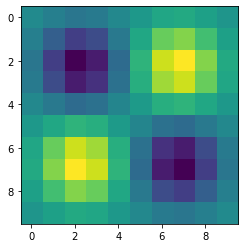

In [24]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [25]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06888349877810346
epoch: 1, loss: 0.04170716387217396
epoch: 2, loss: 0.043755696919734334
epoch: 3, loss: 0.0453672583612064
epoch: 4, loss: 0.04274064408140063
epoch: 5, loss: 0.03873392912509385
epoch: 6, loss: 0.03408471229252329
epoch: 7, loss: 0.03244407722240227
epoch: 8, loss: 0.031560987084855746
epoch: 9, loss: 0.030312792199642162
epoch: 10, loss: 0.02816102409869636
epoch: 11, loss: 0.026351246356797454
epoch: 12, loss: 0.027056061156669375
epoch: 13, loss: 0.026790699569576054
epoch: 14, loss: 0.02656153377497302
epoch: 15, loss: 0.02566933974551545
epoch: 16, loss: 0.025348860695189407
epoch: 17, loss: 0.02480803673936906
epoch: 18, loss: 0.023732094606699592
epoch: 19, loss: 0.022265464436078318
epoch: 20, loss: 0.020810488726352053
epoch: 21, loss: 0.01916129491303538
epoch: 22, loss: 0.018121649154711445
epoch: 23, loss: 0.016592859461028463
epoch: 24, loss: 0.014778237972468314
epoch: 25, loss: 0.013481882429890417
epoch: 26, loss: 0.0129699598650640

In [26]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09344144196765708
epoch: 1, loss: 0.03847494491469224
epoch: 2, loss: 0.028334790012879325
epoch: 3, loss: 0.02495161731408011
epoch: 4, loss: 0.024239566616645038
epoch: 5, loss: 0.023856188574478104
epoch: 6, loss: 0.02182787111281192
epoch: 7, loss: 0.018893749163490278
epoch: 8, loss: 0.019241795566183603
epoch: 9, loss: 0.020946829747305967
epoch: 10, loss: 0.02187300112929908
epoch: 11, loss: 0.020225437488098557
epoch: 12, loss: 0.016985978703174122
epoch: 13, loss: 0.015029558187575716
epoch: 14, loss: 0.014204430495884402
epoch: 15, loss: 0.014762027512510243
epoch: 16, loss: 0.013815195434878899
epoch: 17, loss: 0.012364054012737461
epoch: 18, loss: 0.010042147366427967
epoch: 19, loss: 0.009233064572284629
epoch: 20, loss: 0.009349347363728366
epoch: 21, loss: 0.010080882088469889
epoch: 22, loss: 0.009836438901947138
epoch: 23, loss: 0.008961684332381264
epoch: 24, loss: 0.007860536838856841
epoch: 25, loss: 0.007952361875293548
epoch: 26, loss: 0.00806751

In [27]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [2, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Generate Data

In [28]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(216, 1)


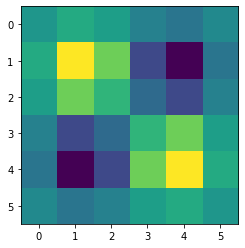

In [29]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [30]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09503080111188264
epoch: 1, loss: 0.07131605341456128
epoch: 2, loss: 0.05539257297823354
epoch: 3, loss: 0.04538109141473199
epoch: 4, loss: 0.040166461106920744
epoch: 5, loss: 0.036581912672133406
epoch: 6, loss: 0.032114736520677055
epoch: 7, loss: 0.029519013548821457
epoch: 8, loss: 0.029390661543155807
epoch: 9, loss: 0.029852533316691878
epoch: 10, loss: 0.029911282064185488
epoch: 11, loss: 0.030425309633529258
epoch: 12, loss: 0.030589562716429323
epoch: 13, loss: 0.03068986841226526
epoch: 14, loss: 0.029724535768319193
epoch: 15, loss: 0.02815935853515242
epoch: 16, loss: 0.0273586572666215
epoch: 17, loss: 0.027149160357953204
epoch: 18, loss: 0.02732380740905134
epoch: 19, loss: 0.027826753518855777
epoch: 20, loss: 0.026736642497674285
epoch: 21, loss: 0.0256362054139416
epoch: 22, loss: 0.024637133565924944
epoch: 23, loss: 0.02443166603913308
epoch: 24, loss: 0.02358062692154877
epoch: 25, loss: 0.02353253292606469
epoch: 26, loss: 0.02303071351984962

In [31]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.04929826013089703
epoch: 1, loss: 0.031981478279415304
epoch: 2, loss: 0.024375019904732606
epoch: 3, loss: 0.021731959567876387
epoch: 4, loss: 0.02175370798865817
epoch: 5, loss: 0.022650170500369323
epoch: 6, loss: 0.023383846321195608
epoch: 7, loss: 0.02317652981565656
epoch: 8, loss: 0.02290383975880445
epoch: 9, loss: 0.022275046638121056
epoch: 10, loss: 0.021996478110726296
epoch: 11, loss: 0.0214250106453271
epoch: 12, loss: 0.020719401625186432
epoch: 13, loss: 0.01998516272853687
epoch: 14, loss: 0.019070362821057705
epoch: 15, loss: 0.017605081274046617
epoch: 16, loss: 0.015176424650923297
epoch: 17, loss: 0.012464493072753132
epoch: 18, loss: 0.010324536917289786
epoch: 19, loss: 0.009549416798254686
epoch: 20, loss: 0.009447713508234472
epoch: 21, loss: 0.00923994430357399
epoch: 22, loss: 0.009105743478709967
epoch: 23, loss: 0.009068213425285266
epoch: 24, loss: 0.00886527972086152
epoch: 25, loss: 0.009051811703317298
epoch: 26, loss: 0.009189692282

In [32]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [3, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))

### Deep QKN

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)


qnn = sequential_qnn(q_bits = [3, 4, 4],
                     dim = [3, 4, 4, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    
saver(qnn, data_path("trainability_qnn_3D_deep"))

In [ ]:
x = scaler(x, mode="standard")

dnn = sequential_dnn(dim = [3, 6, 5, 1], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)

In [ ]:
plt.plot(qnn.loss)
plt.plot(dnn.loss)
plt.show()

### Hybrid Neural Network

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=-2, b=2)

In [ ]:
np.random.seed(42)

layer1 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)
layer2 = Dense(n_features=3, n_targets=1, activation=Identity())
layers = [layer1, layer2]
network = NeuralNetwork(layers=layers, optimizer = Adam(lr=0.1))

In [ ]:
network.train(x, y, epochs=100, verbose=True)
saver(network, data_path("trainability_hybrid_2_layer"))

## Single Circuit

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)


In [ ]:
plt.plot(x,y)

In [ ]:
qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)

In [ ]:
qnn.train(x, y, verbose=True)